In [1]:
import numpy as np
import matplotlib.pyplot as plt
import examples
import okada
from patch_geometry import ver2patchconnect
%matplotlib  widget

In [2]:
# This is a pre-made set of parameters to test if I want to
xcen,ycen,U,d,nu,delta,strike,length,width,fault_type = examples.okada('strike slip')
print('xcen: '+str(xcen))       # [m] NS offset of source from center of grid
print('ycen: '+str(ycen))       # [m] EW offset of source from center of grid
print('U: '+str(U))             # [m] U is slip
print('d: '+str(d))             # [m] depth (positive down)
print('nu: '+str(nu))           # [unitless] Poisson ratio
print('delta: '+str(delta))     # [degrees] delta is dip angle, 90.0 exactly might cause numerical issues?
print('strike: '+str(strike))   # [degrees] counter clockwise from north
print('length: '+str(length))   # [m] # len,W are the fault length and width, resp.
print('width: '+str(width))     # [m]
print('fault_type: '+str(fault_type)) # fault_type is 1 2 3 for strike, dip, and opening

1 m of left-lateral slip on NS-striking vertical fault (70km down to 14km) that ruptures surface
xcen: 0
ycen: 0
U: 1.0
d: 0.001
nu: 0.27
delta: 90.0
strike: 90.0
length: 70000.0
width: 15000.0
fault_type: 1


In [3]:
# NEW set of parameters for LS fault, Sierra El-Mayor 2010 EQ. 
# Which paper has most of these? 

# Gonzalez-Ortega et al., 2014
# Right lateral strike-slip, 120 km-long rupture (surface rupture? or this is length of fault slip?)
# seismogenic zone extending to a depth of ~10 km: Castro et al., 2011
# 

xcen = 0
ycen = 0
U = -1.0
#U = -4.0 # this is maximum slip from EQ- negative makes sure it's right-lateral 
d = 2500 # shallow d=depth to CENTROID of fault surface. Not the top surface.
#d=5000
#d = 7500 # a little deeper
nu = 0.27 # using the default value here
delta = 71 # using fault segment 3 from Fialko et al., 2010
strike = 308 # using fault segment 3, clockwise from north 
strike=0
#length = 13480 # using fault segment 3 
length = 100000
#width = 10000 # up to depth 10 km 
width = 5000
fault_type = 1 # strike-slip 

In [4]:
# This just makes sure the code works at ONE x,y point. 
'''
x = 0.0
y = 0.0 

ue,un,uz = okada.forward(x, y, xcen=xcen, ycen=ycen, \
                         depth=15001, length=length, width=width, \
                         slip=U, opening=0.0,  \
                         strike=strike, dip=delta, rake=0.0, \
                         nu=nu)

print(ue,un,uz)
'''

'\nx = 0.0\ny = 0.0 \n\nue,un,uz = okada.forward(x, y, xcen=xcen, ycen=ycen,                          depth=15001, length=length, width=width,                          slip=U, opening=0.0,                           strike=strike, dip=delta, rake=0.0,                          nu=nu)\n\nprint(ue,un,uz)\n'

In [5]:
# Now loop over a whole grid to make maps of east,north,up displacements at a bunch of locations. 
# For ~2000x2000 points, this takes ~10 minutes. 

x_vals = np.arange(-100000,100000,1000)
y_vals = np.arange(-110000,110000,1000)

dy = len(y_vals)
dx = len(x_vals)

disp_east  = np.ndarray(shape=(dy,dx),dtype='float')
disp_north = np.ndarray(shape=(dy,dx),dtype='float')
disp_up    = np.ndarray(shape=(dy,dx),dtype='float')

for y in range(dy):
    for x in range(dx):
        # run the x,y position through the function 
        x_temp = x_vals[x]
        y_temp = y_vals[y]
        ue,un,uz = okada.forward(x_temp, y_temp, xcen=xcen, ycen=ycen, \
                         depth=d, length=length, width=width, \
                         slip=U, opening=0.0,  \
                         strike=strike, dip=delta, rake=0.0, \
                         nu=nu)
        # now put the east,north,up displacements into their respective map 
        disp_east[y,x] = ue
        disp_north[y,x] = un
        disp_up[y,x] = uz

/mnt/data/LagunaSalada/Notebooks_github/19_Okada_model/okada.py:252: RuntimeWarning: divide by zero encountered in scalar divide
  np.arctan( (eta * (X + q*np.cos(dip)) + X*(R + X) * np.sin(dip)) /


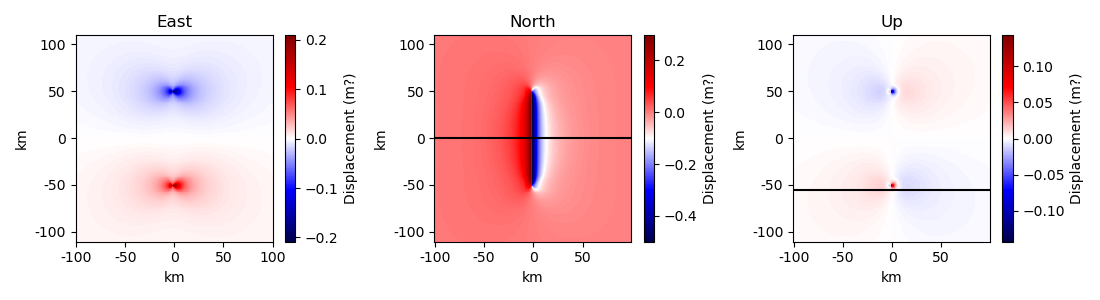

In [6]:
plt.figure(figsize=(11,3),tight_layout=True)
plt.subplot(1,3,1)
plt.pcolor(x_vals,y_vals,disp_east,cmap='seismic')
plt.colorbar(label='Displacement (m?)')
x_locs, x_labels = plt.xticks()
y_locs, y_labels = plt.yticks()
plt.xticks(x_locs[1::],[int(v) for v in (x_locs/1000)][1::])
plt.yticks(y_locs[1:-1],[int(v) for v in (y_locs/1000)][1:-1])
plt.xlabel('km'); plt.ylabel('km')
plt.title('East')
plt.subplot(1,3,2)
plt.pcolor(x_vals,y_vals,disp_north,cmap='seismic')
plt.colorbar(label='Displacement (m?)')
plt.xticks(x_locs[1::],[int(v) for v in (x_locs/1000)][1::])
plt.yticks(y_locs[1:-1],[int(v) for v in (y_locs/1000)][1:-1])
plt.plot([x_vals[0],x_vals[-1]],[0.0,0.0],'k-')
plt.xlabel('km'); plt.ylabel('km')
plt.title('North')
plt.subplot(1,3,3)
plt.pcolor(x_vals,y_vals,disp_up,cmap='seismic')
plt.colorbar(label='Displacement (m?)')
plt.xticks(x_locs[1::],[int(v) for v in (x_locs/1000)][1::])
plt.yticks(y_locs[1:-1],[int(v) for v in (y_locs/1000)][1:-1])
plt.plot([x_vals[0],x_vals[-1]],[y_vals[55],y_vals[55]],'k-')
plt.xlabel('km'); plt.ylabel('km')
plt.title('Up')
plt.show()

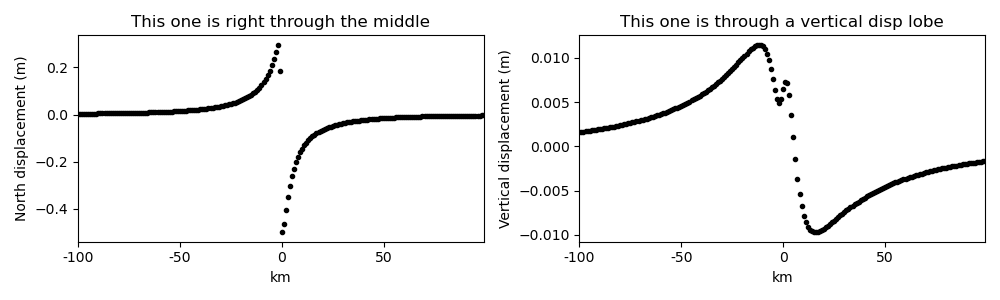

In [7]:
plt.figure(figsize=(10,3),tight_layout=True)
plt.subplot(1,2,1)
plt.plot(x_vals,disp_north[int(dy/2),:],'k.')
plt.xticks(x_locs[1::],[int(v) for v in (x_locs/1000)][1::])
plt.xlabel('km')
plt.xlim(x_vals[0],x_vals[-1])
plt.ylabel('North displacement (m)')
plt.title('This one is right through the middle')
plt.subplot(1,2,2)
# plt.plot(x_vals,disp_up[int(dy/2),:],'k.')
plt.plot(x_vals,disp_up[55,:],'k.')
plt.xticks(x_locs[1::],[int(v) for v in (x_locs/1000)][1::])
plt.xlabel('km')
plt.xlim(x_vals[0],x_vals[-1])
plt.ylabel('Vertical displacement (m)')
plt.title('This one is through a vertical disp lobe')
plt.show()

In [8]:
# THIS SHOULD be the same as looping over all x-values but at y=0, test it:
transect_east  = np.ndarray(shape=(dx,),dtype='float')
transect_north = np.ndarray(shape=(dx,),dtype='float')
transect_up    = np.ndarray(shape=(dx,),dtype='float')

for x in range(dx):
    x_temp = x_vals[x]
    ue,un,uz = okada.forward(x=x_temp, y=0.0, xcen=xcen, ycen=ycen, \
                         depth=d, length=length, width=width, \
                         slip=U, opening=0.0,  \
                         strike=strike, dip=delta, rake=0.0, \
                         nu=nu)
    # now put the east,north,up displacements into their respective transect
    transect_east[x] = ue
    transect_north[x] = un
    transect_up[x] = uz

In [9]:
# Yes, these are the same. 
print(np.all(disp_north[int(dy/2),:]==transect_north))

True


In [16]:
# Just one fault patch - invert for slip 

print('Array sizes: ')
# Taking a row of the disp_north array that cuts through the portion of slip. 
G = transect_north.reshape((dx,1))
print('G: \t\t'+str(np.shape(G)))

# m is the amount of slip (in meters) we want on the fault 
m = [3.0]
print('input m: \t'+str(np.shape(m)))

# dat is the forward-modelled data that we use with G to get m. 
dat = np.matmul(G,m)
print('d: \t\t'+str(np.shape(dat)))

# This is the inverse 
Gg = np.matmul(np.linalg.inv(np.matmul(G.T,G)),G.T)
print('Gg: \t\t'+str(np.shape(Gg)))

# solve for the amount of slip on the fault with Gg and the d 
m1 = np.matmul(Gg,dat)
print('solved-for m: \t'+str(np.shape(m1)))

print('\nModel input and output: ')
# make sure that the solved-for fault slip is the same as the forward one.
print('input m: \t'+str(m))
print('solved-for m: \t'+str(m1))

Array sizes: 
G: 		(200, 1)
input m: 	(1,)
d: 		(200,)
Gg: 		(1, 200)
solved-for m: 	(1,)

Model input and output: 
input m: 	[3.0]
solved-for m: 	[3.]


In [11]:
# Shift the x location of the fault for the new Gg matrix that will invert with the original/"correct" data, calculate misfit and L2 norm.

# loop over different x locations of fault. The "correct" one is 0, so maybe let's loop over -10000 m to 10000 m 
x_fault_locs = np.arange(-10000,10000,5)
m_vals_solved = np.ndarray((len(x_fault_locs),),dtype='float')
L2_norms = np.ndarray((len(x_fault_locs),),dtype='float')

# dat will be the same for every iteration 
# make temporary data (d) matrix with the "correct" data, G 
# keeping the same m from before (3m slip)
dat = np.matmul(G,m)

for i in range(len(x_fault_locs)):
    # forward model the data, then invert it with the already-made Gg from fault patch 1 
    
    #transect_east  = np.ndarray(shape=(dx,),dtype='float')
    transect_north = np.ndarray(shape=(dx,),dtype='float')
    #transect_up    = np.ndarray(shape=(dx,),dtype='float')

    for x in range(dx):
        x_temp = x_vals[x]
        ue,un,uz = okada.forward(x=x_temp, y=0.0, xcen=x_fault_locs[i], ycen=ycen, \
                            depth=d, length=length, width=width, \
                            slip=U, opening=0.0,  \
                            strike=strike, dip=delta, rake=0.0, \
                            nu=nu)
        # now put the east,north,up displacements into their respective transect
        #transect_east[x] = ue
        transect_north[x] = un
        #transect_up[x] = uz
    
    # make the temporary G matrix for this fault x location 
    G_temp = transect_north.reshape(dx,1)
    # make a temporary Gg matrix for inverting data
    Gg_temp = np.matmul(np.linalg.inv(np.matmul(G_temp.T,G_temp)),G_temp.T)
    # Then use the temporary Gg (from current configuration of data) to invert this fault slip configuration with 'correct' data
    m_temp = np.matmul(Gg_temp,dat)
    # put it into the array for the 'solved-for' model values 
    m_vals_solved[i] = m_temp[0]
    # re-predict the G/disp transect with the m_vals_solved value 
    dat_predicted = np.matmul(G_temp,m_temp)
    # take the norm of the residuals (L2 norm) btw "correct" data (dat) and re-predicted data (dat_predicted)
    L2_norms[i] = np.linalg.norm(dat-dat_predicted)

    # Notes from meeting with Rowena: 
    # Use the 'wrong' Gg with the right data 
    # new forward model with the wrong Gg and wrong model 
    # then claculate the norm of the residual 
    # show the m, in real case you don't know that 
    # 
    # try 10 in each dimension, find best x,z for each dip, use her code to find gemoetry/corners of the fault and save it. 
    # color each one by the slip that was solved-for, peak where it fits the data well. 

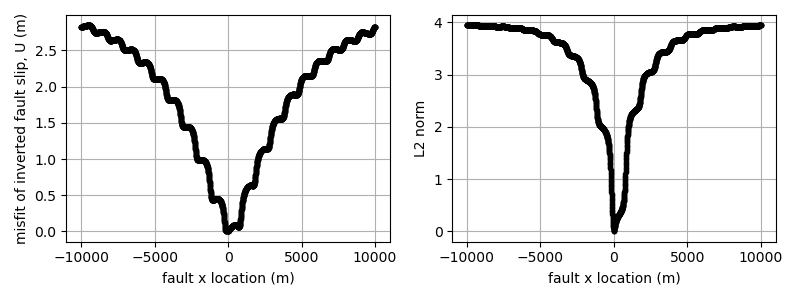

In [12]:
plt.figure(figsize=(8,3),tight_layout=True)
plt.subplot(1,2,1)
plt.plot(x_fault_locs,np.abs(m_vals_solved-3.0),'k.')
plt.xlabel('fault x location (m)')
plt.ylabel('misfit of inverted fault slip, U (m)')
plt.grid()
plt.subplot(1,2,2)
plt.plot(x_fault_locs,L2_norms,'k.')
plt.xlabel('fault x location (m)')
plt.ylabel('L2 norm')
plt.grid()
plt.show()

# these plots are lumpy because the original data only has datapoints every 1000 m, so it fits a little better to the data at those spots. 
# ideally we wouldn't have a smaller grid spacing for fitting than we do the original data, but at least we know why it's a little weird-looking now.

In [ ]:
# Now loop over lots of dips, x and z fault locations, and find the modelled slip value and the residual norm (L2 norm) for each combo. 
# takes a long time - have it print out things instead. 

# dip values to loop over 
dips = np.arange(20,91,5)
print('Number of dips to loop over: '+str(len(dips)))
# x-location values to loop over 
x_fault_locs = np.arange(-1000,1001,100)
print('Number of x locations to loop over: '+str(len(x_fault_locs)))
# depths to loop over 
z_fault_locs = np.arange(2500,15000,100)
print('Number of z locations to loop over: '+str(len(z_fault_locs)))

# make a data cube (3D array) to hold the residual norms (L2 norms) for each combination of dip, z fault location, and x fault location 
L2_norms = np.ndarray((len(dips),len(z_fault_locs),len(x_fault_locs)),dtype='float')
# make a data cube (3D array) to hold the solved-for m/model values (fault slip, U)
m_vals_solved = np.ndarray((len(dips),len(z_fault_locs),len(x_fault_locs)),dtype='float')
# temporary array for holding Okada-modelled north disp values for transect of x values. 
temp_okada_vals = np.ndarray((len(x_vals)),dtype="float")

# loop over dips, x fault locations, and z fault locations, make a transect along x_vals, solve for m, calculate residuals, 
for d in range(len(dips)): # range(len(dips))
    print('dip: '+str(dips[d]))
    # for this dip value, need to loop over x-location and depths (z)
    for x in range(len(x_fault_locs)):
        print('\tx fault loc: '+str(x_fault_locs[x]))
        for z in range(len(z_fault_locs)):
            for i in range(len(x_vals)):
                x_temp = x_vals[x]
                # Now run the Okada model with the parameters I'm looping over 
                ue,un,uz = okada.forward(x=x_temp, y=0.0, xcen=x_fault_locs[x], ycen=ycen, \
                                depth=z_fault_locs[z], length=length, width=width, \
                                slip=U, opening=0.0,  \
                                strike=strike, dip=dips[d], rake=0.0, \
                                nu=nu)
                # now put the north displacements into their respective transect
                temp_okada_vals[i] = un

            # Now invert for the amount of slip, and calculate misfit to the "true" transect of north disp values and save those values 
            # make the temporary G matrix for this fault x location 
            G_temp = temp_okada_vals.reshape(dx,1)
            # make a temporary Gg matrix for inverting data
            Gg_temp = np.matmul(np.linalg.inv(np.matmul(G_temp.T,G_temp)),G_temp.T)
            # Then use the temporary Gg (from current configuration of data) to invert this fault slip configuration with 'correct' data
            m_temp = np.matmul(Gg_temp,dat)
            # put it into the array for the 'solved-for' model values 
            m_vals_solved[d,z,x] = m_temp[0]
            # re-predict the G/disp transect with the m_vals_solved value 
            dat_predicted = np.matmul(G_temp,m_temp)
            # take the norm of the residuals (L2 norm) btw "correct" data (dat) and re-predicted data (dat_predicted)
            L2_norms[d,z,x] = np.linalg.norm(dat-dat_predicted)

dip: 20
	x fault loc: -1000
	x fault loc: -900
	x fault loc: -800
	x fault loc: -700
	x fault loc: -600
	x fault loc: -500
	x fault loc: -400
	x fault loc: -300
	x fault loc: -200
	x fault loc: -100
	x fault loc: 0
	x fault loc: 100
	x fault loc: 200
	x fault loc: 300
	x fault loc: 400
	x fault loc: 500
	x fault loc: 600
	x fault loc: 700
	x fault loc: 800
	x fault loc: 900
dip: 25
	x fault loc: -1000
	x fault loc: -900
	x fault loc: -800
	x fault loc: -700
	x fault loc: -600
	x fault loc: -500
	x fault loc: -400
	x fault loc: -300
	x fault loc: -200
	x fault loc: -100
	x fault loc: 0
	x fault loc: 100
	x fault loc: 200
	x fault loc: 300
	x fault loc: 400
	x fault loc: 500
	x fault loc: 600
	x fault loc: 700
	x fault loc: 800
	x fault loc: 900
dip: 30
	x fault loc: -1000
	x fault loc: -900
	x fault loc: -800
	x fault loc: -700
	x fault loc: -600
	x fault loc: -500
	x fault loc: -400
	x fault loc: -300
	x fault loc: -200
	x fault loc: -100
	x fault loc: 0
	x fault loc: 100
	x fault loc:

In [15]:
# find minimum value in temp_res and x,z,dip values that go along with it 
min_index_flat = np.argmin(L2_norms) # this is just one number
# need to translate it into 3D indices
min_coords = np.unravel_index(min_index_flat,np.shape(L2_norms))
dip_index = min_coords[0]
z_index   = min_coords[1]
x_index   = min_coords[2]
# based on min_index, find the ideal values of dip, x fault loc, and z fault loc 
best_dip = dips[dip_index]
best_zloc = z_fault_locs[z_index]
best_xloc = x_fault_locs[x_index]

print(best_dip)
print(best_zloc)
print(best_xloc)



# Note from meeting with Rowena: 
# now I have my dadat cube, transect thorugh in x dimendion is zero, looking at all dips at all depths 
# will look like a big bullseye                

20
2500
-1000


In [ ]:
# plot them because it somehow fits it to the shallowest, most west option?? Why??


In [ ]:
# This cell tests a way to find the location and values (x-loc, dip, z-loc) of the best-fit fault with lowest L2-norm value
# just a little sample array to make sure the flattening/reshaping works properly.

# Create a sample 3D array
arr_3d = np.array([
    [[10, 20, 5],
     [30, 40, 60]],

    [[70, 80, 90],
     [1, 100, 110]]
])

# Find the flattened index of the minimum value
min_flat_index = np.argmin(arr_3d)
print(min_flat_index)

# Unravel the flattened index into 3D coordinates
min_coords = np.unravel_index(min_flat_index, arr_3d.shape)
print(min_coords)

print(f"The 3D array:\n{arr_3d}\n")
print(f"The minimum value is at index: {min_coords}")
print(f"The minimum value itself is: {arr_3d[min_coords]}")

9


'\n# Unravel the flattened index into 3D coordinates\nmin_coords = np.unravel_index(min_flat_index, arr_3d.shape)\n\nprint(f"The 3D array:\n{arr_3d}\n")\nprint(f"The minimum value is at index: {min_coords}")\nprint(f"The minimum value itself is: {arr_3d[min_coords]}")\n'

In [ ]:
# turn this into a subroutine that takes 
# aingle value of faultx,faultz,dip
# produces tempres value 
# could also output the data_predicted 

# then at the end when I have a best combo of values, run it through this again to get the predicted data/synthetic to plot and stuff 

for i in range(len(x_vals)):
                x_temp = x_vals[x]
                # Now run the Okada model with the parameters I'm looping over 
                ue,un,uz = okada.forward(x=x_temp, y=0.0, xcen=x_fault_locs[x], ycen=ycen, \
                                depth=z_fault_locs[z], length=length, width=width, \
                                slip=U, opening=0.0,  \
                                strike=strike, dip=dips[d], rake=0.0, \
                                nu=nu)
                # now put the north displacements into their respective transect
                temp_okada_vals[i] = un

            # Now invert for the best x and z location that fits this iteration of the okada model vertical slice 

            # make the temporary G matrix for this fault x location 
            G_temp = temp_okada_vals.reshape((len(z_fault_locs)*len(x_fault_locs)),1)
            # make a temporary Gg matrix for inverting data
            Gg_temp = np.matmul(np.linalg.inv(np.matmul(G_temp.T,G_temp)),G_temp.T)
            # Then use the temporary Gg (from current configuration of data) to invert this fault slip configuration with 'correct' data
            m_temp = np.matmul(Gg_temp,dat)
            # put it into the array for the 'solved-for' model values 
            m_vals_solved[d,z,x] = m_temp[0]
            # re-predict the G/disp transect with the m_vals_solved value 
            dat_predicted = np.matmul(G_temp,m_temp)
            # take the norm of the residuals (L2 norm) btw "correct" data (dat) and re-predicted data (dat_predicted)
            temp_res[d,z,x] = np.linalg.norm(dat-dat_predicted)

# find minimum i temp_res and x,z,dip values that go along with it 

# when I need to find the best value (minimum in the residual cube), make a subroutine for that to find it 


***
***
Updated up to here
***
***

In [ ]:
# Now vary the dip and calculate the misfit for each new G matrix that makes data, then invert with old Gg matrix 

# loop over different dips. The "correct" one is 71, and let's loop over 0-90
fault_dips = np.arange(0,90.5,0.5)
m_vals_solved_2 = np.ndarray((len(fault_dips),),dtype='float')
m = [3.0] # can keep the same m from before (3m slip)

for i in range(len(fault_dips)):
    # forward model the data, then invert it with the already-made Gg from fault patch 1 
    
    #transect_east  = np.ndarray(shape=(dx,),dtype='float')
    transect_north = np.ndarray(shape=(dx,),dtype='float')
    #transect_up    = np.ndarray(shape=(dx,),dtype='float')

    for x in range(dx):
        x_temp = x_vals[x]
        ue,un,uz = okada.forward(x=x_temp, y=0.0, xcen=xcen, ycen=ycen, \
                            depth=d, length=length, width=width, \
                            slip=U, opening=0.0,  \
                            strike=strike, dip=fault_dips[i], rake=0.0, \
                            nu=nu)
        # now put the east,north,up displacements into their respective transect
        #transect_east[x] = ue
        transect_north[x] = un
        #transect_up[x] = uz
    
    # make the temporary G matrix for this fault x location 
    G_temp = transect_north.reshape(dx,1)
    # can keep the same m from before (3m slip)
    # make temporary data (d) matrix with this current loop iteration of the fault xlocation 
    dat_temp = np.matmul(G_temp,m)
    # Then use the already-made inverse thing Gg to invert this fault slip configuration 
    m_temp = np.matmul(Gg,dat_temp)
    # put it into the array for the 'solved-for' model values 
    m_vals_solved_2[i] = m_temp[0]

In [ ]:
plt.figure(figsize=(4,3),tight_layout=True)
plt.plot(fault_dips,np.abs(m_vals_solved_2-3.0),'k.')
plt.xlabel('fault dip')
plt.ylabel('misfit of inverted fault slip, U (m)')
plt.grid()
plt.show()

G is two cols - each col is the predicted N component of disp from each fault patch 

m is just two values of slip (U)

d is resulting data

d = np.matmul G and m - gives the data 

Gg is the inverse thing 

2.
Make d0 (no noise) 
then vary dip in the forward model and solve again, do it 

1.
Get inversion to work 
take single vertical fault patch, just shift the x0 location and see what you get 
plot of misfit to the true data vs. shift 

In [ ]:
# Now forward model from a different, deeper fault that's right below the other one. 

# The only parameters that need updating for this fault patch is the depth 
# keeping them both the same width, 5000 m 
d = 7500

# Now loop over a whole grid to make maps of east,north,up displacements at a bunch of locations. 
disp_east_2  = np.ndarray(shape=(dy,dx),dtype='float')
disp_north_2 = np.ndarray(shape=(dy,dx),dtype='float')
disp_up_2    = np.ndarray(shape=(dy,dx),dtype='float')

for y in range(dy):
    for x in range(dx):
        # run the x,y position through the function 
        x_temp = x_vals[x]
        y_temp = y_vals[y]
        ue,un,uz = okada.forward(x_temp, y_temp, xcen=xcen, ycen=ycen, \
                         depth=d, length=length, width=width, \
                         slip=U, opening=0.0,  \
                         strike=strike, dip=delta, rake=0.0, \
                         nu=nu)
        # now put the east,north,up displacements into their respective map 
        disp_east_2[y,x] = ue
        disp_north_2[y,x] = un
        disp_up_2[y,x] = uz

In [ ]:
plt.figure(figsize=(11,3),tight_layout=True)
plt.subplot(1,3,1)
plt.pcolor(x_vals,y_vals,disp_east_2,cmap='seismic')
plt.colorbar(label='Displacement (m?)')
x_locs, x_labels = plt.xticks()
y_locs, y_labels = plt.yticks()
plt.xticks(x_locs[1::],[int(v) for v in (x_locs/1000)][1::])
plt.yticks(y_locs[1:-1],[int(v) for v in (y_locs/1000)][1:-1])
plt.xlabel('km'); plt.ylabel('km')
plt.title('East')
plt.subplot(1,3,2)
plt.pcolor(x_vals,y_vals,disp_north_2,cmap='seismic')
plt.colorbar(label='Displacement (m?)')
plt.xticks(x_locs[1::],[int(v) for v in (x_locs/1000)][1::])
plt.yticks(y_locs[1:-1],[int(v) for v in (y_locs/1000)][1:-1])
plt.xlabel('km'); plt.ylabel('km')
plt.title('North')
plt.subplot(1,3,3)
plt.pcolor(x_vals,y_vals,disp_up_2,cmap='seismic')
plt.colorbar(label='Displacement (m?)')
plt.xticks(x_locs[1::],[int(v) for v in (x_locs/1000)][1::])
plt.yticks(y_locs[1:-1],[int(v) for v in (y_locs/1000)][1:-1])
plt.xlabel('km'); plt.ylabel('km')
plt.title('Up')
plt.suptitle('Second fault patch')
plt.show()

In [ ]:
# Now add them together, so we get disp maps of the combined effect of both fault patches: 
disp_east_combo  = disp_east  + disp_east_2
disp_north_combo = disp_north + disp_north_2
disp_up_combo    = disp_up    + disp_up_2

In [ ]:
plt.figure(figsize=(11,3),tight_layout=True)
plt.subplot(1,3,1)
plt.pcolor(x_vals,y_vals,disp_east_combo,cmap='seismic')
plt.colorbar(label='Displacement (m?)')
x_locs, x_labels = plt.xticks()
y_locs, y_labels = plt.yticks()
plt.xticks(x_locs[1::],[int(v) for v in (x_locs/1000)][1::])
plt.yticks(y_locs[1:-1],[int(v) for v in (y_locs/1000)][1:-1])
plt.xlabel('km'); plt.ylabel('km')
plt.title('East')
plt.subplot(1,3,2)
plt.pcolor(x_vals,y_vals,disp_north_combo,cmap='seismic')
plt.colorbar(label='Displacement (m?)')
plt.xticks(x_locs[1::],[int(v) for v in (x_locs/1000)][1::])
plt.yticks(y_locs[1:-1],[int(v) for v in (y_locs/1000)][1:-1])
plt.xlabel('km'); plt.ylabel('km')
plt.title('North')
plt.subplot(1,3,3)
plt.pcolor(x_vals,y_vals,disp_up_combo,cmap='seismic')
plt.colorbar(label='Displacement (m?)')
plt.xticks(x_locs[1::],[int(v) for v in (x_locs/1000)][1::])
plt.yticks(y_locs[1:-1],[int(v) for v in (y_locs/1000)][1:-1])
plt.xlabel('km'); plt.ylabel('km')
plt.title('Up')
plt.suptitle('Both fault patches superimposed')
plt.show()

In [ ]:
plt.figure(figsize=(10,3),tight_layout=True)
plt.subplot(1,2,1)
# plt.plot(x_vals,disp_up[int(dy/2),:],'k.')
plt.plot(x_vals,disp_up[50,:],'b.',label='fault patch 1')
plt.plot(x_vals,disp_up_2[50,:],'g.',label='fault patch 2')
plt.plot(x_vals,disp_up_combo[50,:],'k.',label='both patches')
plt.xticks(x_locs[1::],[int(v) for v in (x_locs/1000)][1::])
plt.legend()
plt.xlabel('km')
plt.xlim(x_vals[0],x_vals[-1])
plt.ylabel('Vertical displacement (m)')
plt.title('This one is through the upper vertical lobes')
plt.subplot(1,2,2)
plt.plot(x_vals,disp_north[int(dy/2),:],'b.',label='fault patch 1')
plt.plot(x_vals,disp_north_2[int(dy/2),:],'g.',label='fault patch 2')
plt.plot(x_vals,disp_north_combo[int(dy/2),:],'k.',label='both patches')
plt.xticks(x_locs[1::],[int(v) for v in (x_locs/1000)][1::])
plt.xlabel('km')
plt.xlim(x_vals[0],x_vals[-1])
plt.ylabel('North displacement (m)')
plt.title('This one is right through the middle')
plt.suptitle('Both fault patches')
plt.show()

In [ ]:
# Two fault patches, stacked vertically

# Combine both faults when putting them in the G matrix 
G = np.hstack((disp_north[int(dy/2),:].reshape(dx,1),disp_north_2[int(dy/2),:].reshape(dx,1)))
print(np.shape(G))

# m is the amount of slip (in meters) on the fault 
m = [-4.0, -4.0]
print(np.shape(m))

# d is the forward-modelled data that we use with G to get m. 
dat = np.matmul(G,m)
print(np.shape(dat))

# This is the inverse thing that operates on data to get model 
Gg = np.matmul(np.linalg.inv(np.matmul(G.T,G)),G.T)
print(np.shape(Gg))

# solve for the amount of slip on the fault with Gg and the d 
m1 = np.matmul(Gg,dat)
print(np.shape(m1))
print(m1)

In [ ]:
# Try a different x location of the fault and solve for it. 
# 

In [ ]:
rigid = 1e3
area = 10000*100000
slip = 4
Mo = rigid*area*slip
Mw = (2/3)*np.log10(Mo)-6.6

print(Mw)